# Gradient Descent Implementation 

In [69]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [70]:
x, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

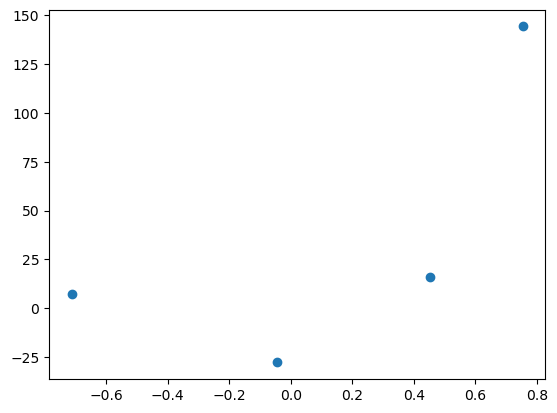

In [71]:
plt.scatter(x,y)

In [72]:
#lets apply OLS
from sklearn.linear_model import LinearRegression

In [73]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [74]:
reg.coef_

array([78.35063668])

In [75]:
reg.intercept_

26.15963284313262

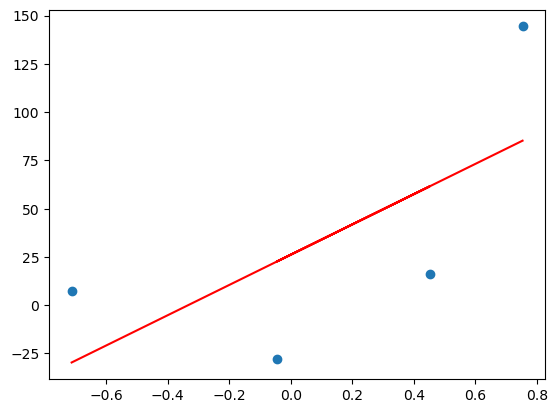

In [76]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red')

In [77]:
# Lets apply gradient descent assuming slope is constant , m = 78.35
# and lets assume the starting value for intercept b = 0
y_pred = ((78.35 * x) + 0).reshape(4)

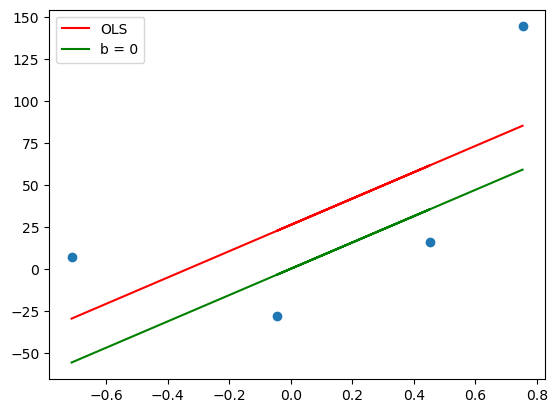

In [78]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='green', label='b = 0')
plt.legend()
plt.show()

In [79]:
# starting gradient descent
m = 78.35
b = 0
#slope at b = 0
loss_shape = -2 * np.sum(y - m * x.ravel() - b)
loss_shape

-209.27763408209216

In [80]:
#learning rate = 0.1
lr = 0.1

step_size = loss_shape * lr
step_size

-20.927763408209216

In [81]:
# Calculating new intercept
b = b - step_size
b

20.927763408209216

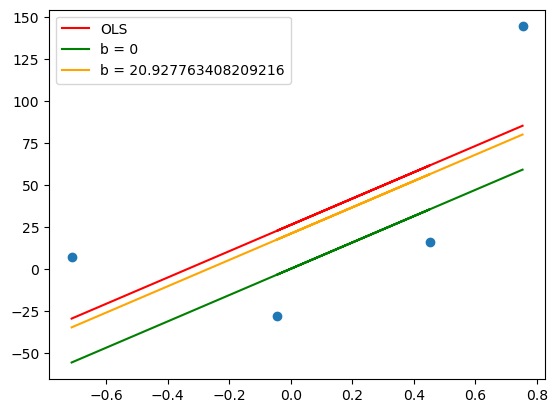

In [82]:
y_pred1 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='green', label='b = 0')
plt.plot(x, y_pred1, color='orange', label='b = {}'.format(b))
plt.legend()
plt.show()

In [83]:
#first Iteration

loss_shape = -2 * np.sum(y - m * x.ravel() - b)
loss_shape

-41.85552681641843

In [84]:
step_size = loss_shape * lr
step_size

-4.185552681641844

In [85]:
b = b - step_size
b

25.11331608985106

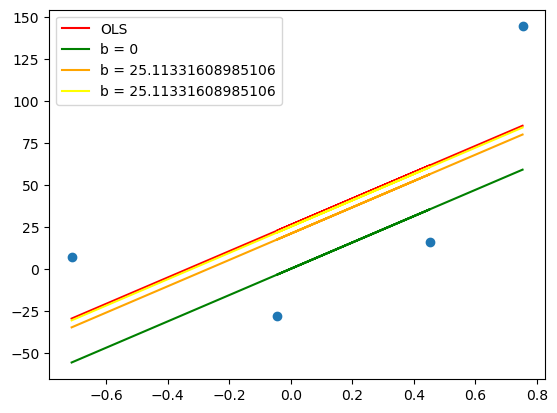

In [86]:
y_pred2 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='green', label='b = 0')
plt.plot(x, y_pred1, color='orange', label='b = {}'.format(b))
plt.plot(x, y_pred2, color='yellow', label='b = {}'.format(b))
plt.legend()
plt.show()

In [87]:
#second Iteration

loss_shape = -2 * np.sum(y - m * x.ravel() - b)
loss_shape

-8.371105363283675

In [88]:
step_size = loss_shape * lr
step_size

-0.8371105363283675

In [89]:
b = b - step_size
b

25.95042662617943

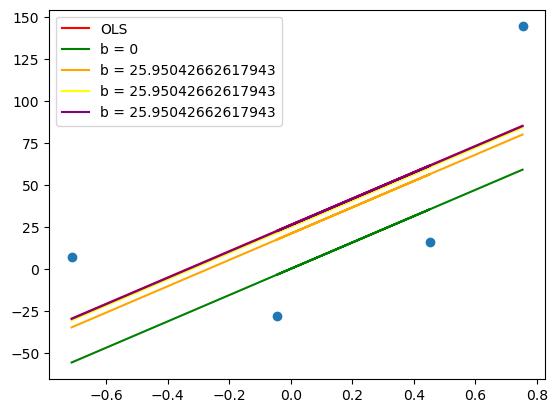

In [90]:
y_pred3 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color='red', label='OLS')
plt.plot(x, y_pred, color='green', label='b = 0')
plt.plot(x, y_pred1, color='orange', label='b = {}'.format(b))
plt.plot(x, y_pred2, color='yellow', label='b = {}'.format(b))
plt.plot(x, y_pred3, color='purple', label='b = {}'.format(b))
plt.legend()
plt.show()

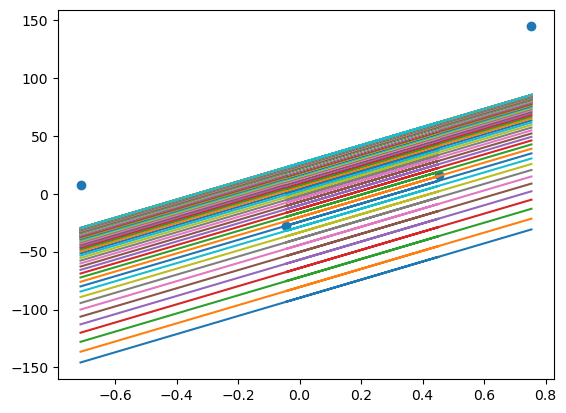

In [91]:
#Iterative Method
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*x.ravel() - b)
    b = b - (lr * loss_slope)
    y_pred = m * x + b
    plt.plot(x,y_pred)

plt.scatter(x, y)

# Gradient Descent Class

In [94]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)


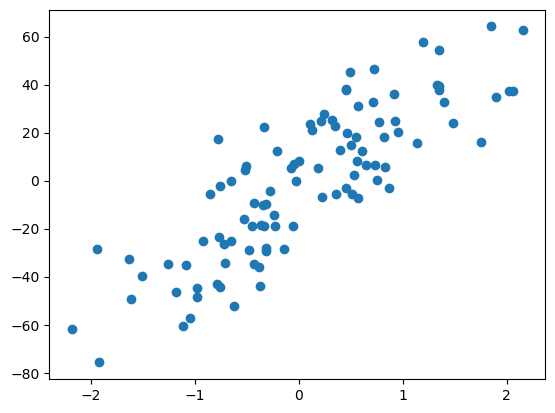

In [95]:
plt.scatter(x,y)

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression


In [98]:
lr = LinearRegression()

In [99]:
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [56]:
m = 6.72

In [110]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [111]:
gd = GDRegressor(0.001,50)

In [112]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854
